In [50]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, sigma_sb, c
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [51]:
pwd

'/home/cody/Binary Search'

I've already done a lot of the table clean stuff, so the only thing left to do right now is to add the RV values

In [58]:

%run Binary_Data_Clean2.py
Tables = Binary_Data_Clean2('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [59]:
AllAvg, AllVis, ISO = Tables.get_data()

In [60]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)

In [65]:
AAS_RG = Tables.rg_cut(AllAvg)

In [67]:
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO, limit=0.005)

In [68]:
AAS_RV = Tables.rv_table_add(AAS_RG_ISO, AllVis)

In [69]:
AAS_RV

RADIALV,RADIAL_ERR,RADIAL_DATE,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB,ISO_MEANM,ISO_MEDIANM,ISO_STDM,ISO_MEANL,ISO_MEDIANL,ISO_STDL,ISO_MEANR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solMass,solMass,solMass,solLum,solLum,solLum,solRad
str111,str111,str141,str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32

In [45]:
AAS_RV['ISO_MEANM'][0]

1.2797845602035522

(array([  1.,  60., 516., 366., 187.,  59.,  26.,  21.,  19.,   7.]),
 array([3448.19995117, 3624.24445801, 3800.28896484, 3976.33347168,
        4152.37797852, 4328.42248535, 4504.46699219, 4680.51149902,
        4856.55600586, 5032.6005127 , 5208.64501953]),
 <a list of 10 Patch objects>)

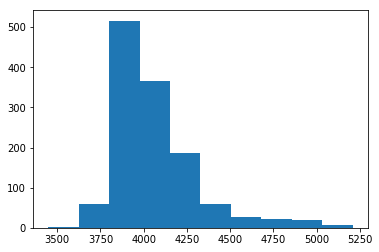

In [29]:
plt.hist(AAS_RV['TEFF'])

<Quantity 79.25752793 solRad>

In [49]:
sigma_sb

<<class 'astropy.constants.codata2014.CODATA2014'> name='Stefan-Boltzmann constant' value=5.670367e-08 uncertainty=1.3e-13 unit='W / (K4 m2)' reference='CODATA 2014'>

In [ ]:
AllAvg_LMC = Tables.mc_cut(AAS_RV, 'L')
AllAvg_SMC = Tables.mc_cut(AAS_RV, 'S')

In [ ]:
AllAvg_LMC.write('AllAvg_LMC', format = 'fits')
AllAvg_SMC.write('AllAvg_SMC', format = 'fits')

In [9]:
AllAvg_LMC = fits.open('AllAvg_LMC')
AllAvg_SMC = fits.open('AllAvg_SMC')
AllAvg_LMC = AllAvg_LMC[1].data
AllAvg_SMC = AllAvg_SMC[1].data
AllAvg_LMC = Table(AllAvg_LMC)
AllAvg_SMC = Table(AllAvg_SMC)


In [10]:
%run Table_Convert.py
AllAvg_SMC=Table_Convert(AllAvg_SMC)
AllAvg_LMC=Table_Convert(AllAvg_LMC)

In [ ]:
#Make the nvist cut again becasue I made some SNR cutsmonta
AllAvg_LMC = Tables.nvisits_cut(AllAvg_LMC,5)
AllAvg_SMC = Tables.nvisits_cut(AllAvg_SMC,5)

In [16]:
%run Binary_Fraction.py
thing_LMC = Binary_Fraction(AllAvg_LMC)
thing_SMC = Binary_Fraction(AllAvg_SMC)

In [20]:
1*u.solMass.to(u.jupiterMass)

1047.5655146604772

In [18]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(500,'L',True,False,[0,1],30)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(500,'L',True,False,[0,1],30)
"""
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC2 = thing_LMC2.Real_Data_Fraction()
real_data_SMC2 = thing_SMC2.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC2 = thing_LMC2.synthetic_detection_rate(200,'L',True,False,[0,1],30)
synthetic_rates_SMC2 = thing_SMC2.synthetic_detection_rate(200,'L',True,False,[0,1],30)
"""

"\n#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]\nreal_data_LMC2 = thing_LMC2.Real_Data_Fraction()\nreal_data_SMC2 = thing_SMC2.Real_Data_Fraction()\n\n#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]\nsynthetic_rates_LMC2 = thing_LMC2.synthetic_detection_rate(200,'L',True,False,[0,1],30)\nsynthetic_rates_SMC2 = thing_SMC2.synthetic_detection_rate(200,'L',True,False,[0,1],30)\n"

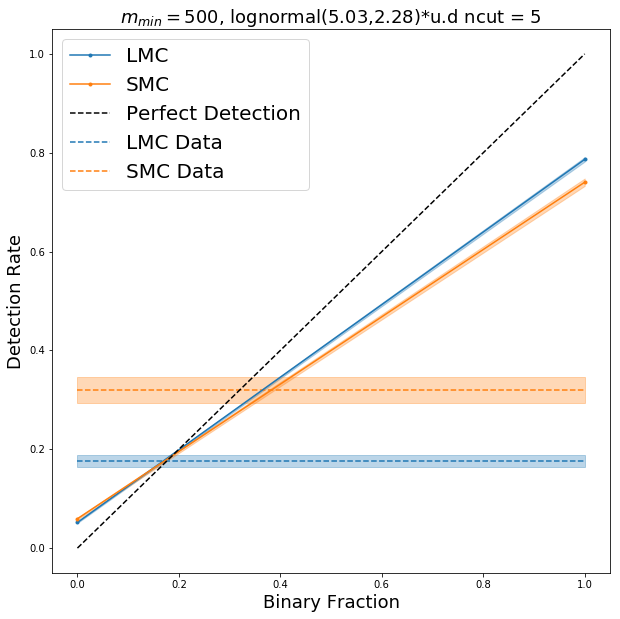

In [19]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 500$, lognormal(5.03,2.28)*u.d ncut = 5', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

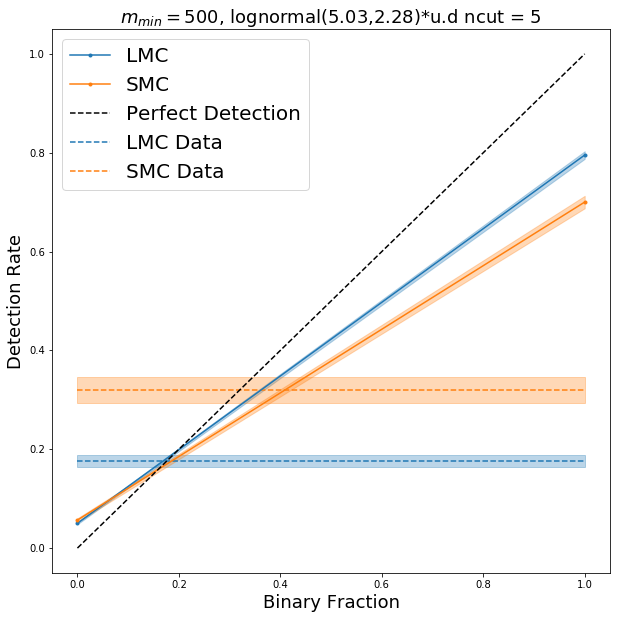

In [23]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(500,'U',True,False,[0,1],10)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(500,'U',True,False,[0,1],10)

plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 500$, lognormal(5.03,2.28)*u.d ncut = 5', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

#### DO it all again with mc_rgb_nocuts

In [ ]:
Tables = Binary_Data_Clean2('/home/cody/Binary Search/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)

AAS_RG = Tables.rg_cut(AllAvg)
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO, limit = 0.1)

AAS_RV = Tables.rv_table_add(AAS_RG_ISO, AllVis)

AllAvg_LMC = Tables.mc_cut(AAS_RV, 'L')
AllAvg_SMC = Tables.mc_cut(AAS_RV, 'S')

In [ ]:
%run Table_Convert.py
AllAvg_SMC=Table_Convert(AllAvg_SMC)
AllAvg_LMC=Table_Convert(AllAvg_LMC)

thing_LMC = Binary_Fraction(AllAvg_LMC)
thing_SMC = Binary_Fraction(AllAvg_SMC)

#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(200,'L',True,False,[0,1],30)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(200,'L',True,False,[0,1],30)

In [ ]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, lognormal(5.03,2.28)*u.d ncut = 5', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [ ]:
len(AllAvg_SMC)

In [ ]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC2[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC2[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC2[3][0][1], synthetic_rates_LMC2[3][1][1]],
                 [synthetic_rates_LMC2[3][0][0], synthetic_rates_LMC2[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC2[3][0][0], real_data_LMC2[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC2[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC2[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC2[3][0][1], synthetic_rates_SMC2[3][1][1]],
                 [synthetic_rates_SMC2[3][0][0], synthetic_rates_SMC2[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC2[3][0][0], real_data_SMC2[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, lognormal(5.03,2.28)*u.d ncut = 5', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

### Almost no difference when we set tighter restriction on the isochrone fitting

# 2dHist
I want to make the 2dhist I had on the poster so....lets figure out how to do that

In [ ]:
LMC_Fake_Table_L = thing_LMC.Synthetic_Table(200,'L',True,False,10)
LMC_Fake_Table_U = thing_LMC.Synthetic_Table(200,'U',True,False,10)

All the crap below here is stuff from my older codes. I don't remember how this works but it makes a nice histogram of the acceptance paramiters so I haven't messed with it. At some point I should go through this and make it less of an abomination

In [ ]:
BTF_a_SMC = []
BTF_mi_SMC = []

BTF_a_no_SMC = []
BTF_mi_no_SMC = []

BTF_a_all_SMC = SMC_Fake_Table['a']
m_all_SMC = SMC_Fake_Table['m']*u.jupiterMass
m_all_SMC = m_all_SMC.to(u.solMass)
m_all_SMC = m_all_SMC.value

i_all_SMC = SMC_Fake_Table['i']

BTF_mi_all_SMC = m_all_SMC * np.sin(i_all_SMC)

for n in range(len(SMC_Fake_Table)):
    if SMC_Fake_Table["Binary"][n]:
        BTF_a_SMC.append(SMC_Fake_Table['a'][n])
        m = SMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        
        i = SMC_Fake_Table['i'][n]
        BTF_mi_SMC.append(m*np.sin(i))
    else:
        BTF_a_no_SMC.append(SMC_Fake_Table['a'][n])
        m = SMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        i = SMC_Fake_Table['i'][n]
        BTF_mi_no_SMC.append(m*np.sin(i))
fig, ax = plt.subplots(1,1, figsize = (20,10))      
ax.scatter(BTF_a_SMC, BTF_mi_SMC, label = 'accepted',alpha = 0.4)
ax.scatter(BTF_a_no_SMC, BTF_mi_no_SMC,alpha = 0.4, label = 'rejected')
ax.set_title('Detection Rate of Synthetic Binaries SMC',fontsize = 18)
ax.set_ylabel('$m*\sin(i)$', fontsize = 18)
ax.set_xlabel('$a$ (AU)', fontsize = 18)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()        

In [ ]:
#BTF_mi_all_SMC = BTF_mi_all_SMC*u.jupiterMass
#BTF_mi_all_SMC = BTF_mi_all_SMC.to(u.solMass)
#BTF_mi_all_SMC = BTF_mi_all_SMC.value
H_all, xed,yed, image = plt.hist2d(BTF_a_all_SMC,BTF_mi_all_SMC, bins = [np.logspace(-1.5,1.3,40), np.linspace(0,1.5,40) ])


#BTF_mi_SMC = BTF_mi_SMC*u.jupiterMass
#BTF_mi_SMC = BTF_mi_SMC.to(u.solMass)
#BTF_mi_SMC = BTF_mi_SMC.value
H_ac, xed2,yed2,image2 = plt.hist2d(BTF_a_SMC,BTF_mi_SMC, bins = [np.logspace(-1.5,1.3,40), np.linspace(0,1.5,40) ])

fig = plt.figure(figsize=(14,10))
#plt.hist2d(H_ac/(H_all+0.001), bins =[np.logspace(-1,1,5), np.linspace(0,1000,5) ] )
#plt.xscale("log")
#plt.xlabel('a (AU)')
#plt.ylabel('$m*\sin(i)$')
##plt.yscale('log')
#plt.colorbar()
#plt.show()
X, Y = np.meshgrid(xed, yed)
plt.pcolormesh(X, Y, H_ac.T/(H_all.T+0.001))
plt.xscale("log")
plt.xlabel('a (AU)', fontsize = 30)
plt.ylabel('$m*\sin(i)$  $(M_{\odot})$',fontsize = 30)
plt.title('Detection Rate of Synthetic Binaries (SMC)', fontsize = 30)
plt.tick_params(axis='both',which = 'major', labelsize = 26)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 18)
fig.savefig('detection binary hist SMC.png')

In [ ]:
BTF_a_LMC = []
BTF_mi_LMC = []

BTF_a_no_LMC = []
BTF_mi_no_LMC = []

BTF_a_all_LMC = LMC_Fake_Table_L['a']
m_all_LMC = LMC_Fake_Table_L['m']*u.jupiterMass
m_all_LMC = m_all_LMC.to(u.solMass)
m_all_LMC = m_all_LMC.value

i_all_LMC = LMC_Fake_Table_L['i']

BTF_mi_all_LMC = m_all_LMC * np.sin(i_all_LMC)

for n in range(len(LMC_Fake_Table_L)):
    if LMC_Fake_Table_L["Binary"][n]:
        BTF_a_LMC.append(LMC_Fake_Table_L['a'][n])
        m = LMC_Fake_Table_L['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        
        i = LMC_Fake_Table_L['i'][n]
        BTF_mi_LMC.append(m*np.sin(i))
    else:
        BTF_a_no_LMC.append(LMC_Fake_Table_L['a'][n])
        m = LMC_Fake_Table_L['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        i = LMC_Fake_Table_L['i'][n]
        BTF_mi_no_LMC.append(m*np.sin(i))
fig, ax = plt.subplots(1,1, figsize = (20,10))      
ax.scatter(BTF_a_LMC, BTF_mi_LMC, label = 'accepted',alpha = 0.4)
ax.scatter(BTF_a_no_LMC, BTF_mi_no_LMC,alpha = 0.4, label = 'rejected')
ax.set_title('Detection Rate of Synthetic Binaries LMC',fontsize = 18)
ax.set_ylabel('$m*\sin(i)$', fontsize = 18)
ax.set_xlabel('$a$ (AU)', fontsize = 18)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()        

In [ ]:
#BTF_mi_all_SMC = BTF_mi_all_SMC*u.jupiterMass
#BTF_mi_all_SMC = BTF_mi_all_SMC.to(u.solMass)
#BTF_mi_all_SMC = BTF_mi_all_SMC.value
H_all, xed,yed, image = plt.hist2d(BTF_a_all_LMC,BTF_mi_all_LMC, bins = [np.logspace(-2,1.5,40), np.linspace(0,1.6,40) ])


#BTF_mi_SMC = BTF_mi_SMC*u.jupiterMass
#BTF_mi_SMC = BTF_mi_SMC.to(u.solMass)
#BTF_mi_SMC = BTF_mi_SMC.value
H_ac, xed2,yed2,image2 = plt.hist2d(BTF_a_LMC,BTF_mi_LMC, bins = [np.logspace(-2,1.5,40), np.linspace(0,1.6,40) ])

fig = plt.figure(figsize=(14,10))
#plt.hist2d(H_ac/(H_all+0.001), bins =[np.logspace(-1,1,5), np.linspace(0,1000,5) ] )
#plt.xscale("log")
#plt.xlabel('a (AU)')
#plt.ylabel('$m*\sin(i)$')
##plt.yscale('log')
#plt.colorbar()
#plt.show()
X, Y = np.meshgrid(xed, yed)
plt.pcolormesh(X, Y, H_ac.T/(H_all.T+0.001))
plt.xscale("log")
plt.xlabel('a (AU)', fontsize = 30)
plt.ylabel('$m*\sin(\i)$  $(M_{\odot})$',fontsize = 30)
plt.title('Detection Rate of Synthetic Binaries (LMC)', fontsize = 30)
plt.tick_params(axis='both',which = 'major', labelsize = 26)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 18)
fig.savefig('detection binary hist LMC.png')

I want to look at the period distribution of Uniform vs log normal. I'm surprised the lognormal distribution gives a higher acceptance rate at 1 than the uniform

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### I want to mess around with other 'nvisits' cut offs. So i'm going to restart the kernal. And at this point I think I'm going to set the nvisit cut off to be varriable that you can set so I don't have to keep changing things everytime I want to run this.  

In [ ]:
import warnings
warnings.filterwarnings('ignore')
Tables = Binary_Data_Clean('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.nocut.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.load_tables()

In [ ]:
%run Binary_Data_Clean.py
%run Binary_Fraction.py

In [ ]:
AAS_RG_ISO_4, AllVisSimp = Tables.nvisits_cut(AAS_RG_ISO,AllVis,4)

In [ ]:
AAS_RG_ISO_4_RV = Tables.rv_table_add(AAS_RG_ISO_4,AllVisSimp)

In [ ]:
for N in AAS_RG_ISO_4_RV['RADIAL_DATE']:
    if any(t < 0 for t in N):
        print('Problem', N)

In [ ]:
AAS_RG_ISO_4_RV['RADIAL_DATE']

In [ ]:
AllAvg_LMC_4 = Tables.mc_cut(AAS_RG_ISO_4_RV, 'L')
AllAvg_SMC_4 = Tables.mc_cut(AAS_RG_ISO_4_RV, 'S')

In [ ]:
thing_LMC_4 = Binary_Fraction(AllAvg_LMC_4)
thing_SMC_4 = Binary_Fraction(AllAvg_SMC_4)

In [ ]:
p_value_result_LMC_200_UP4, binary_result_LMC_200_UP4,  detection_rate_LMC_200_UP4 = thing_LMC_4.synthetic_detection_rate(200,'U',True,False,[0,1],30)
p_value_result_SMC_200_UP4, binary_result_SMC_200_UP4,  detection_rate_SMC_200_UP4 = thing_SMC_4.synthetic_detection_rate(200,'U',True,False,[0,1],30)

In [ ]:
real_data_detection_LMC_4, binary_bool_LMC_4 = thing_LMC_4.Real_Data_Fraction()
real_data_detection_SMC_4, binary_bool_SMC_4 = thing_SMC_4.Real_Data_Fraction()
LMC_binary_detection_4 = np.count_nonzero(binary_bool_LMC_4)/len(binary_bool_LMC_4)
SMC_binary_detection_4 = np.count_nonzero(binary_bool_SMC_4)/len(binary_bool_SMC_4)

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_UP4,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection_4, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_UP4, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection_4, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days, nvisits $\greater = 4$', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

Something wierd happened when I added NVISITS = 4 into the group. So I'm going to plot out just the starts with NVISITS = 4, to see WTF happenend. 

### Things to do
##### Add Errors
##### Metalicity Cut between the two. 
##### Remove points from the data set. 
##### Milky Way stars, large table stuff

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
binary_count0LMC = np.count_nonzero(binary_result_LMC_200_UP[0])
binary_count1LMC = np.count_nonzero(binary_result_LMC_200_UP[1])
binary_countLMC = np.array([binary_count0LMC, binary_count1LMC])
print(binary_count0LMC, binary_count1LMC)
binary_count0LMC = np.count_nonzero(binary_result_LMC_200_UP[0])
binary_count1LMC = np.count_nonzero(binary_result_LMC_200_UP[1])
binary_countLMC = np.array([binary_count0LMC, binary_count1LMC])
print(binary_count0LMC, binary_count1LMC)

binary_count0SMC = np.count_nonzero(binary_result_SMC_200_UP[0])
binary_count1SMC = np.count_nonzero(binary_result_SMC_200_UP[1])
binary_countSMC = np.array([binary_count0SMC, binary_count1SMC])
print(binary_count0SMC, binary_count1SMC)
binary_count0SMC = np.count_nonzero(binary_result_SMC_200_UP[0])
binary_count1SMC = np.count_nonzero(binary_result_SMC_200_UP[1])
binary_countSMC = np.array([binary_count0SMC, binary_count1SMC])
print(binary_count0SMC, binary_count1SMC)

In [ ]:
len(binary_result_LMC_200_UP[0]), len(binary_result_LMC_200_UP[1])

In [ ]:
#I'm just going to use shot noise for the errors. 
binary_err0LMC = np.sqrt(binary_count0LMC)
binary_err1LMC = np.sqrt(binary_count1LMC)
binary_err_arrayLMC = np.array([binary_err0LMC, binary_err1LMC])


#I'm just going to use shot noise for the errors. 
binary_err0SMC = np.sqrt(binary_count0SMC)
binary_err1SMC = np.sqrt(binary_count1SMC)
binary_err_arraySMC = np.array([binary_err0SMC, binary_err1SMC])


In [ ]:
#Get upper and lower bound on LMC error.
upper_lmc_binary_count = binary_countLMC + binary_err_arrayLMC
upper_errorLMC = upper_lmc_binary_count/len(binary_result_LMC_200_UP[0])

lower_lmc_binary_count = binary_countLMC - binary_err_arrayLMC
lower_errorLMC = lower_lmc_binary_count/len(binary_result_LMC_200_UP[0]) 

upper_smc_binary_count = binary_countSMC + binary_err_arraySMC
upper_errorSMC = upper_smc_binary_count/len(binary_result_SMC_200_UP[0])

lower_smc_binary_count = binary_countSMC - binary_err_arraySMC
lower_errorSMC = lower_smc_binary_count/len(binary_result_SMC_200_UP[0]) 

### Real data errors. 
Done, see above sections

##### Metalicity Cut between the two. 
I want to look at just LMC stars (larger sample) cut them equal chuncks by metalicity and see what the acceptance rate looks like. 

Looks like the metalicity cut should be around -0.67 for the FE_H lines

In [ ]:
import matplotlib.pyplot as plt
bin_stuff = plt.hist(AllAvg_LMC_5['FE_H'],bins = 'auto')

In [ ]:
 plt.hist(AllAvg_SMC_5['FE_H'],bins = 'auto')

In [ ]:
foo = 0
n = 0
while foo < sum(bin_stuff[0])/2:
    foo += bin_stuff[0][n]
    n+= 1
    print(foo, n)

In [ ]:
bin_stuff[1][19]

Looks like the metalicity cut should be around -0.67 for the FE_H lines

In [ ]:
cut_off = -0.67
AllAvg_LMC_5_high_metal = AllAvg_LMC_5[:][AllAvg_LMC_5['FE_H'] >= cut_off2]
AllAvg_LMC_5_low_metal = AllAvg_LMC_5[:][AllAvg_LMC_5['FE_H'] < cut_off2]
cut_off2 = -1.12
AllAvg_SMC_5_high_metal = AllAvg_SMC_5[:][AllAvg_SMC_5['FE_H'] >= cut_off2]
AllAvg_SMC_5_low_metal = AllAvg_SMC_5[:][AllAvg_SMC_5['FE_H'] < cut_off2]
len(AllAvg_LMC_5_high_metal),len(AllAvg_LMC_5_low_metal), len(AllAvg_SMC_5_high_metal),len(AllAvg_SMC_5_low_metal)

In [ ]:
AllAvg_LMC_5_low_metal

In [ ]:
thing_LMC_5_hm = Binary_Fraction(AllAvg_LMC_5_high_metal)
thing_LMC_5_lm = Binary_Fraction(AllAvg_LMC_5_low_metal)

In [ ]:
thing_LMC_5_hm = Binary_Fraction(AllAvg_LMC_5_high_metal)
thing_LMC_5_lm = Binary_Fraction(AllAvg_LMC_5_low_metal)

p_value_result_hm, binary_result_hm,  detection_rate_hm, errors_hm = thing_LMC_5_hm.synthetic_detection_rate(200,'U',True,False,[0,1],20)
p_value_result_lm, binary_result_lm,  detection_rate_lm, errors_lm = thing_LMC_5_lm.synthetic_detection_rate(200,'U',True,False,[0,1],20)

real_data_detection_hm, binary_bool_hm, binary_detection_hm, rd_err_hm = thing_LMC_5_hm.Real_Data_Fraction()
real_data_detection_lm, binary_bool_lm, binary_detection_lm, rd_err_lm = thing_LMC_5_lm.Real_Data_Fraction()

plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_hm,'.-', color = 'C0', label = 'LMC High Metal')
plt.hlines(binary_detection_hm, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC HM Data')
plt.fill_between([0,1], [errors_hm[0][1],errors_hm[1][1]], [errors_hm[0][0], errors_hm[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_hm[0][0], rd_err_hm[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_lm, '.-', color = 'C1', label = 'LMC Low Metal')
plt.hlines(binary_detection_lm, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_lm[0][1],errors_lm[1][1]], [errors_lm[0][0], errors_lm[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_lm[0][0], rd_err_lm[0][1], alpha = 0.3, color = 'C1')

plt.plot(b_frac, detection_rate_LMC,'.-', color = 'C2', label = 'LMC Full')
plt.hlines(LMC_binary_detection_5, 0 ,1, color = 'C2', linestyles='dashed', label = 'LMC Data Full')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('LMC detection broking into Melaiclty FE_H = {} '.format(cut_off2), size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_hm,'.-', color = 'C0', label = 'LMC High Metal')
plt.hlines(binary_detection_hm, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC HM Data')
plt.fill_between([0,1], [errors_hm[0][1],errors_hm[1][1]], [errors_hm[0][0], errors_hm[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_hm[0][0], rd_err_hm[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_lm, '.-', color = 'C1', label = 'LMC Low Metal')
plt.hlines(binary_detection_lm, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_lm[0][1],errors_lm[1][1]], [errors_lm[0][0], errors_lm[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_lm[0][0], rd_err_lm[0][1], alpha = 0.3, color = 'C1')

plt.plot(b_frac, detection_rate_LMC,'.-', color = 'C2', label = 'LMC Full')
plt.hlines(LMC_binary_detection_5, 0 ,1, color = 'C2', linestyles='dashed', label = 'LMC Data Full')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('LMC detection broking into Melaiclty FE_H = -0.67 ', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [ ]:
thing_SMC_5_hm = Binary_Fraction(AllAvg_SMC_5_high_metal)
thing_SMC_5_lm = Binary_Fraction(AllAvg_SMC_5_low_metal)

p_value_result_hm, binary_result_hm,  detection_rate_hm, errors_hm = thing_SMC_5_hm.synthetic_detection_rate(200,'U',True,False,[0,1],20)
p_value_result_lm, binary_result_lm,  detection_rate_lm, errors_lm = thing_SMC_5_lm.synthetic_detection_rate(200,'U',True,False,[0,1],20)

real_data_detection_hm, binary_bool_hm, binary_detection_hm, rd_err_hm = thing_SMC_5_hm.Real_Data_Fraction()
real_data_detection_lm, binary_bool_lm, binary_detection_lm, rd_err_lm = thing_SMC_5_lm.Real_Data_Fraction()

plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_hm,'.-', color = 'C0', label = 'SMC High Metal')
plt.hlines(binary_detection_hm, 0 ,1, color = 'C0', linestyles='dashed', label = 'SMC HM Data')
plt.fill_between([0,1], [errors_hm[0][1],errors_hm[1][1]], [errors_hm[0][0], errors_hm[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_hm[0][0], rd_err_hm[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_lm, '.-', color = 'C1', label = 'SMC Low Metal')
plt.hlines(binary_detection_lm, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC LM Data')
plt.fill_between([0,1], [errors_lm[0][1],errors_lm[1][1]], [errors_lm[0][0], errors_lm[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_lm[0][0], rd_err_lm[0][1], alpha = 0.3, color = 'C1')

plt.plot(b_frac, detection_rate_SMC,'.-', color = 'C2', label = 'SMC Full')
plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C2', linestyles='dashed', label = 'SMC Data Full')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('SMC Separated by Melatlicty FE_H = {}'.format(cut_off), size = 18)
plt.legend(prop = {'size': 20})
plt.show()

Same plot as before but this time I'm just looking at the LMC, and splitting things up betweent stars with higher metalicity and stars with lower metalicity. While the synthetic rates are rather different, the data rates are different enough that they are just about the same

In [ ]:
errors_hm = [item for sublist in AllAvg_LMC_5_high_metal['RADIAL_ERR'] for item in sublist]

In [ ]:
np.mean(errors_hm), np.median(errors_hm)

In [ ]:
errors_lm = [item for sublist in AllAvg_LMC_5_low_metal['RADIAL_ERR'] for item in sublist]

In [ ]:
np.mean(errors_lm), np.median(errors_lm)

In [ ]:
plt.figure(1)
plt.hist(AllAvg_LMC_5_high_metal['VERR'], bins = 'auto')
plt.show()

In [ ]:
plt.figure(2)
plt.hist(AllAvg_LMC_5_low_metal['VERR'], bins = 'auto')
plt.show()

In [ ]:
np.mean(AllAvg_LMC_5_high_metal['VERR']), np.median(AllAvg_LMC_5_high_metal['VERR'])

In [ ]:
np.mean(AllAvg_LMC_5_low_metal['VERR']), np.median(AllAvg_LMC_5_low_metal['VERR'])

In [ ]:
import psutil
psutil.virtual_memory()

In [ ]:
AAS_RG_ISO

In [ ]:
""" This is the tutorial in how to use the Joker taken from the documentation page. """
from thejoker.data import RVData
from thejoker.plot import plot_rv_curves
from thejoker.sampler import compute_likelihoods
from thejoker.sampler import JokerParams

import astropy.units as  u
import matplotlib.pyplot as plt
import numpy as np
import schwimmbad
t = [ 0., 2.9883, 27.93244, 30.92312, 35.9274 ]
rv_dat = [13.133986, 12.98943,  13.194267, 13.211391, 13.196156]* u.km/u.s
err = [0.02661381, 0.04872429, 0.02927109, 0.02699425, 0.03350932] * u.km/u.s + 0.024902766289999146 * u.km/u.s

data = RVData(t = t, rv=rv_dat, stddev = err)
ax = data.plot()
ax.set_xlabel("Time [day]")
ax.set_ylabel("RV [km/s]")
plt.show()

In [ ]:
for N in range(len(AllAvg_LMC_5)):
    t = AllAvg_LMC_5['RADIAL_DATE'][N]
    rv_dat = AllAvg_LMC_5['RADIALV'][N]*u.km/u.s
    err = AllAvg_LMC_5['RADIAL_ERR'][N]*u.km/u.s
    data = RVData(t = t, rv=rv_dat, stddev = err)
    ax = data.plot()
    ax.set_xlabel("Time [day]")
    ax.set_ylabel("RV [km/s]")
    ax.hlines(np.mean(rv_dat.value), 0 ,t[-1], linestyles='dashed')
    ax.set_title((real_data_detection_LMC_5[N]))
    plt.show()
    plt.close()

In [ ]:
for N in range(len(AllAvg_SMC_5)):
    t = AllAvg_SMC_5['RADIAL_DATE'][N]
    rv_dat = AllAvg_SMC_5['RADIALV'][N]*u.km/u.s
    err = AllAvg_SMC_5['RADIAL_ERR'][N]*u.km/u.s
    data = RVData(t = t, rv=rv_dat, stddev = err)
    ax = data.plot()
    ax.set_xlabel("Time [day]")
    ax.set_ylabel("RV [km/s]")
    ax.hlines(np.mean(rv_dat.value), 0 ,t[-1], linestyles='dashed')
    #ax.set_ylim(np.mean(rv_dat.value)-3, np.mean(rv_dat.value)+3)
    ax.set_title((real_data_detection_SMC_5[N]))
    plt.show()
    plt.close()

In [ ]:
np.mean(AllAvg_LMC_5['FE_H'])

In [ ]:
np.mean(AllAvg_SMC_5['FE_H'])

In [ ]:
# %load Binary_Fraction.py
from astropy.table import Table, Column, vstack
from astropy.io import fits
import numpy as np
from scipy.stats import chi2
import astropy.units as u
from astropy.constants import G, sigma_sb, c

from astropy.time import Time

from thejoker.data import RVData
from twobody.wrap import cy_rv_from_elements
from twobody.utils import ArrayProcessor
from twobody import KeplerOrbit
# TODO: One thing that I think is really hurting this project is the 'synthetic_detection_rate'
#       part of the code. What would probably be a lot more efficient would be to
#       make a cataloge of synthetic signals and then I would just have a large
#       set of fake signals that I could use over and over again. Rather than having
#       to run the synthetic_detection over and over again. Having a set synthetic
#       table I think will make my life easier
#       BUT, there's a problem with saving fits files with different numbers of
#       elements in an array. So I either make an all_visit style table, or I
#       have to save each synthetic table as it's own, run my analysis, and then
#       combine the results from all the different NVISITS values. Not sure what
#       the most efficent way to do this is.
class Binary_Fraction:
    def __init__(self,AAS_TABLE):
        self.AAS_TABLE = AAS_TABLE

    def buddy_values(self, N, m_min, period):
        """
        Makes a list of the paramiters of the secondary star for the primary star
        in row 'N' from AAS_TABLE

        Inputs
        ----------
        N: This is just the row that I want to use when looking at the AAS_TABLE
        m_min: Minimum mass I want to consider. This should be in Jupiter Masses.

        Output
        ----------
        List of the physical paramiters randomly made from the companion star.
        """
        M = self.AAS_TABLE['ISO_MEANM'][N]*u.solMass
        #Make the fake companion that we want orbiting our primary star
        m_buddy = np.random.uniform(m_min, M.to(u.jupiterMass).value)*u.jupiterMass #For reference the 1 solMas = 1047 jupMas

        #Checks what kind of period distribution we want
        if period == 'U' or period == 'u':
            P_buddy = np.random.uniform(12,1000)*u.d
        elif period == 'L' or period == 'l':
            P_buddy = np.random.lognormal(5.03,2.28)*u.d
        else:
            return print('Period flag needs to be "L" or "U" not {}'.format(period))


        if P_buddy.value < 12:
            e_buddy = 0*u.one
        else:
            e_buddy = np.random.uniform(0, 0.93)*u.one
        n_foo = (2 * np.pi) / P_buddy

        a_buddy = np.cbrt(( (G*(M + m_buddy)) / (4*np.pi**2) ) * P_buddy**2 )
        a_buddy = a_buddy.to(u.AU)

        # Also need some angles of the orbit that we would see.
        i_buddy = np.random.uniform(0, np.pi)*u.rad

         #These are some phase angles that depend on when we first see it.
        w_buddy = np.random.uniform(0, 2*np.pi)*u.rad
        phi_buddy = np.random.uniform(0, 2*np.pi)*u.rad

        #Make sure the closest point of the orbit isn't so close that we have to worry about title effects.
        r_peri = (1-e_buddy)*a_buddy
        r_peri = r_peri.to(u.solRad)

        #If the orbit is so close that we would have to consider title effects then we want to pick a different
        #set of orbital paramiters.
        in_case_of_emergency = 0 #Variable that will get us out of the loop if we're stuck forever
        while r_peri.value < 5*self.AAS_TABLE['ISO_MEANR'][N]:

            m_buddy = np.random.uniform(m_min, M.to(u.jupiterMass).value)*u.jupiterMass
            P_buddy = np.random.uniform(12,1000)*u.d
            #P_buddy = np.random.lognormal(5.03,2.28)*u.d
            if P_buddy.value < 12:
                e_buddy = 0*u.one
            else:
                e_buddy = np.random.uniform(0,.93)*u.one
            n = (2*np.pi) / P_buddy

            #From those paramiters we can use keplers law to find the semi-major axis
            a_buddy = np.cbrt(( (G*(M + m_buddy)) / (4*np.pi**2) ) * P_buddy**2 )
            a_buddy = a_buddy.to(u.AU)

            # Also need some angles of the orbit that we would see.
            i_buddy = np.random.uniform(0, np.pi)*u.rad

            #These are some phase angles that depend on when we first see it.
            w_buddy = np.random.uniform(0, 2*np.pi)*u.rad
            phi_buddy = np.random.uniform(0, 2*np.pi)*u.rad
            #Make sure the closest point of the orbit isn't so close that we have to worry about title effects.
            r_peri = (1-e_buddy)*a_buddy
            r_peri = r_peri.to(u.solRad)
            in_case_of_emergency += 1
            if in_case_of_emergency > 9:
                print("You got stuck!")
                break
        # Now I can find the "K" paramiter based on these values.
        K_buddy = (m_buddy / (M + m_buddy)) * (n_foo * a_buddy * np.sin(i_buddy)) / np.sqrt(1-e_buddy**2)
        K_buddy = K_buddy.to(u.km / u.s)
        foo_list = [m_buddy, e_buddy, P_buddy, a_buddy, i_buddy, w_buddy,
                   phi_buddy, K_buddy, self.AAS_TABLE['APOGEE_ID'][N]]

        return foo_list

    def buddy_table(self, buddy_array):
        """
        Takes the output from buddy_values and turns it into an astropy table. The goal is to have a table of
        values from the simulations. Some of
        """
        Foo_Table = Table([[False], [buddy_array[0].value], [buddy_array[1].value], [buddy_array[2].value], [buddy_array[3].value],
                           [buddy_array[4].value], [buddy_array[5].value], [buddy_array[6].value], [buddy_array[7].value],
                           [0], [buddy_array[8]]],
                          names = ('Binary','m','e','P','a','i','w','phi','K','P-value','APOGEE_ID'),
                          dtype=('b','f8','f8','f8','f8','f8','f8','f8','f8','f8','str'))
        return Foo_Table


    def fake_rv_binary(self, N, m_min, period, jitter):
        """
        After I have a set of paramiters form the buddy_values I want to make a fake Radial Velocity Measurment
        based on those values and the Primary Stars Values.
        """
        buddy_list = self.buddy_values(N,m_min, period)
        Date = self.AAS_TABLE['RADIAL_DATE'][N]

        if jitter:
            jitter_value = 2*0.015**(1/3*self.AAS_TABLE["LOGG"][N])
            err = (np.sqrt(self.AAS_TABLE['RADIAL_ERR'][N]**2 + jitter_value**2) )*u.km/u.s
        else:
            err = self.AAS_TABLE['RADIAL_ERR'][N]*u.km/u.s
        # This is some stuff that cy_rv_from_elements needs for it's time input. Not sure why but it doens't
        #work without these few lines. i.e. DO NOT TOUCH!
        t_buddy = Time(Date, format = 'mjd')

        t_buddy = t_buddy.tcb.mjd

        procb = ArrayProcessor(t_buddy)

        t_buddy, = procb.prepare_arrays()

        td0 = t_buddy[0]

        td0 = Time(td0, format = 'mjd')

        #Makes the observed radial velocity in the binaries Barrycenter.
        rv_buddy = cy_rv_from_elements(t_buddy, buddy_list[2].to(u.day).value, 1. , buddy_list[1].value, buddy_list[5].value,
                                         buddy_list[6].value, td0.tcb.mjd,
                                         anomaly_tol = 1E-10, anomaly_maxiter = 128)

        #Then we move the velocity to be in our reference frame. The extra added term at the end is to simulate
        #the fact that we wont observ the actual velocity every measurement will be off from the real value.
        rv_buddy = (buddy_list[7] * rv_buddy + self.AAS_TABLE['VHELIO_AVG'][N] * u.km/ u.s) + np.random.normal(0, self.AAS_TABLE['VERR'][N], size = len(rv_buddy)) * u.km/u.s

        return rv_buddy, err, buddy_list
    # TODO: Get rid of the reduce option. I never use it and it just causes more
    #       problems then it's worth.
    def chi_sq_mean(self, RV, err, reduce):
        """
        I want to fit some radial velocity measurments to a strait line of the average value. The logic goes
        that if the strait line fits the data well, then it's a single star floating in space. If a strait line
        fits the data poorly then there should be something there causing the deviation from the mean.

        Inputs
        ----------
        RV: Radial velocity values
        err: the error in those radial velocity values
        reduce: boolian if I want to find the reduced chi squared or not. Only
                applicable if there are more datapoints than paramiters.
        """
        chi_sq_value = np.sum((RV - np.mean(RV))**2 / (err)**2)
        if reduce:
            return chi_sq_value / (len(RV) - 1)
        else:
            return chi_sq_value
    def fake_binary_detection(self, N, m_min, period, jitter, reduce):
        """
        Uses the chi_sq_value to then find the P-Value then set the variable Binary in buddy table to be True
        or False depending on the threshold we set.
        """
        #First call the fake_rv function
        f_radial_velocity, f_err, bud_list = self.fake_rv_binary(N, m_min, period, jitter)
        #Find the chi^2 for the fake rv values
        chi_squared = self.chi_sq_mean(f_radial_velocity, f_err, reduce)
        #Find the p-value from that chi^2
        p_value = 1 - chi2.cdf(chi_squared, len(f_radial_velocity) - 1)
        #print(chi_squared, p_value)
        #Make the buddy table
        bud_table = self.buddy_table(bud_list)
        #Set the 'P-value' in the buddy table
        bud_table['P-value'] = p_value
        #Check if it's a binary or not.
        if p_value < 0.05:
            f_binary = True
        else:
            f_binary = False
        #Put the result in the table
        bud_table['Binary'] = f_binary
        """
        date = self.AAS_TABLE['RADIAL_DATE'][N]
        RV = f_radial_velocity
        data = RVData(t = date, rv = RV, stddev= f_err)
        data.plot()
        plt.title(p_value)
        plt.show()
        plt.close()
        """
        return f_radial_velocity, f_err, bud_table

    """
    Need the same thing but this time with no buddy, assumes a single star with error and decided if it's in a binary or not
    """
    def fake_solo_detection(self,N, m_min, jitter, reduce):
        jitter = 2*0.015**(1/3*self.AAS_TABLE["LOGG"][N])
        #Make some fake solo RV measurments
        solo_RV = np.random.normal(self.AAS_TABLE['VHELIO_AVG'][N], self.AAS_TABLE['VERR'][N] ,size = len(self.AAS_TABLE["RADIALV"][N]))
        #Keep the real ovserved error
        solo_err = np.sqrt(self.AAS_TABLE['RADIAL_ERR'][N]**2 + jitter**2)
        #Don't think I need the date, but my old stuff has it so I'm keeping it
        Date = self.AAS_TABLE['RADIAL_DATE'][N]
        #Finds the chi_squared and p-value
        solo_chi_squared = self.chi_sq_mean(solo_RV, solo_err, reduce)
        p_value = 1 - chi2.cdf(solo_chi_squared, len(solo_RV) - 1)
        #Check if it's a binary or not.
        if p_value < 0.05:
            solo_binary = True
        else:
            solo_binary = False
        return p_value, solo_binary

    """
    Time to put it all together
    """

    def binary_or_not(self, N, m_min, period, jitter, reduce, b_fraction):
        """
        Picks a random number and if it's below b_fraction then we run fake_binary_detection
        if it's larger than b_fraction then we run fake_solo_detection. Returns the P-value and
        the boolian 'Binary' for each run
        """
        #Pick a random number between 0 and 1.
        foo_random_number = np.random.uniform()
        if foo_random_number < b_fraction:
            foo_rv, foo_err, foo_table = self.fake_binary_detection(N,m_min, period, jitter, reduce)
            return foo_table['P-value'], foo_table['Binary']
        else:
            foo_pvalue, foo_binary = self.fake_solo_detection(N,m_min, jitter, reduce)
            return foo_pvalue, foo_binary


    def Master(self,m_min, period, jitter, reduce, b_fraction,loop):
        """
        Should just have to run this to get the detection rate for different binary
        fractions at the end of the day.
        """
        foo_exit = 0
        pvalue_list = []
        binary_bool_list = []
        while foo_exit < loop:
            for N in range(len(self.AAS_TABLE)):
                p_value, bool_binary = self.binary_or_not(N, m_min, period, jitter, reduce, b_fraction)
                pvalue_list.append(p_value)
                binary_bool_list.append(bool_binary)
            foo_exit += 1
        return pvalue_list, binary_bool_list

    def synthetic_detection_rate(self, m_min, period, jitter, reduce, b_fraction,
                                loop):
        """
        Finds the synthetic detection rate for binary systems with the given input
        set of paramiters.

        Inputs
        ----------
        m_min:  Minimum companion mass I want to consider
        period: Either 'L' or 'U' for the lognormal period distribution or the
                uniform period distribution
                # TODO: I need to mess around with this more. Just found out that
                this using ln normal, not log10 normal, so I might need to fix?
        jitter: Boolian, if I want to add on jitter as an extra noise source,
                almost always set to True
        reduce: Boolian, if I want to use the reduced chi^2 or not. Should always
                be set to False becasue I'm looking for P-value not chi^2 value
                # TODO: GET RID OF THIS! It's always False so why have it around
        b_fraction: Binary fractions I want to consider. This should be an array
                    I've just been doing [0,1] but it could be a list of any value
        loop:   Number of times I want to loop through the table. Normaly set this
                to be between 10 and 50. More loops the more time this will take.

        Outputs
        ----------
        p_value_result: Array of the P-values for each of the different synthetic
                        binary
        binary_result_b:    Boolian array of if the P-Value was low enough to
                        determine if it was in a binary or not. Currently set to
                        0.05 but this can be changed in the 'fake_binary_detection'
                        and 'fake_solo_detection' programs
        detection_rate: Detection rate is kind of the answer I want. Array of
                        length equal to the length of the input b_fraction. Finds
                        the detection fraction based off the binary_result_foo for
                        each desired binary fraction
        detection_rate_error:   Finds the error in the detection rate. This just
                        assumes a shot noise as the source of error, so +/- sqrt(N)
                        this is a two element array for each element in detection_rate
                        first element will be the upper bound error, second will
                        be the lower bound error.
        """
        #Make empty arrays for the answers to be put in.
        detection_rate = []
        p_value_result = []
        binary_result_b = []
        detection_rate_error = []
        for i in b_fraction:
            p_value_foo, binary_result_foo = self.Master(m_min, period, jitter, reduce, i, loop)

            p_value_result.append(p_value_foo)
            binary_result_b.append(binary_result_foo)
            detection_rate.append(np.count_nonzero(binary_result_foo)/len(binary_result_foo))
            error = np.sqrt(np.count_nonzero(binary_result_foo))
            det_upper = (np.count_nonzero(binary_result_foo) + error) /len(binary_result_foo)
            det_lower = (np.count_nonzero(binary_result_foo) - error) /len(binary_result_foo)
            err_foo = [det_upper, det_lower]
            detection_rate_error.append(err_foo)
        return p_value_result, binary_result_b, detection_rate, detection_rate_error

    def Synthetic_Table(self, m_min, period, jitter, reduce, loop):
        """
        I want to make a table of all of the different synthetic paramiters I used
        And keep track of when the Binary detection gave True or False. That way
        I can look at the different cases where detections are made or not

        Inputs
        ----------
        m_min:  Minimum companion mass I want to consider
        period: Either 'L' or 'U' for the lognormal period distribution or the
                uniform period distribution
                # TODO: I need to mess around with this more. Just found out that
                this using ln normal, not log10 normal, so I might need to fix?
        jitter: Boolian, if I want to add on jitter as an extra noise source,
                almost always set to True
        reduce: Boolian, if I want to use the reduced chi^2 or not. Should always
                be set to False becasue I'm looking for P-value not chi^2 value
                # TODO: GET RID OF THIS! It's always False so why have it around
        loop:   Number of times I want to loop through the table. Normaly set this
                to be between 10 and 50. More loops the more time this will take.



        """
        foo_exit = 0
        foo_rv, foo_err, final_table = self.fake_binary_detection(0,m_min, period, jitter, reduce)
        while foo_exit < loop:
            for N in range(len(self.AAS_TABLE)):
                foo_rv, foo_err, foo_table = self.fake_binary_detection(N,m_min, period, jitter, reduce)
                final_table = vstack([final_table, foo_table])
            print('Done with loop', foo_exit)
            foo_exit += 1
        return final_table
    """Does the binary fraction check for the real data table that was put into
    the Binary_Fraction when first initializing. I would also like to change the
    values"""
    def Real_Data_Fraction(self):
        foo_check = []
        rd_p_value_array = []
        rd_Binary_array = []
        detection_rate_error = []
        for K in range(len(self.AAS_TABLE)):
            rd_rv = self.AAS_TABLE['RADIALV'][K]
            rd_err = self.AAS_TABLE['RADIAL_ERR'][K]
            rd_jitter = 2*0.015**(1/3*self.AAS_TABLE["LOGG"][K])
            rd_err = np.sqrt(rd_err**2 + rd_jitter**2)
            rd_chi_squared = self.chi_sq_mean(rd_rv, rd_err, False)
            rd_p_value = 1 - chi2.cdf(rd_chi_squared, len(rd_rv)-1)
            rd_p_value_array.append(rd_p_value)
        for i in rd_p_value_array:
            if i < 0.05:
                rd_Binary_array.append(True)
            else:
                rd_Binary_array.append(False)
        binary_detection = np.count_nonzero(rd_Binary_array)/len(rd_Binary_array)
        error = np.sqrt(np.count_nonzero(rd_Binary_array))
        det_upper = (np.count_nonzero(rd_Binary_array) + error) /len(rd_Binary_array)
        det_lower = (np.count_nonzero(rd_Binary_array) - error) /len(rd_Binary_array)
        err_foo = [det_upper, det_lower]
        detection_rate_error.append(err_foo)

        return rd_p_value_array, rd_Binary_array, binary_detection, detection_rate_error
